# Housekeeping

In [1]:
import pandas as pd
import sys
import os
import matplotlib
%matplotlib inline

# Acknowledgements

[Historical Hourly Weather Data 2012-2017](https://www.kaggle.com/selfishgene/historical-hourly-weather-data)  
_The dataset was aquired using [Weather API](https://openweathermap.org/api) on the [OpenWeatherMap website](https://openweathermap.org/), and is available under the [ODbL License](https://opendatacommons.org/licenses/odbl/)._

# Before Starting

The techniques used throughout this presentation are not recommended in order to answer meaningful questions on weather data. Signal processing techniques and timeseries analysis would be perhaps more appropriate.  
The choice of dataset was due to the flexibility of techiques that can be displayed on these variables.  

# Importing the data

Please, go to [this url](https://www.kaggle.com/selfishgene/historical-hourly-weather-data/downloads/historical-hourly-weather-data.zip/2), log in / sign into Kaggle, download the .zip file with all the data (in .csv format) and extract them in the same folder as this notebook.

In [2]:
files = [i for i in os.walk(".")][0][2]

In [3]:
files

['weather_description.csv',
 'humidity.csv',
 'wind_direction.csv',
 'Weather_pandas_tips.ipynb',
 'temperature.csv',
 'pressure.csv',
 'city_attributes.csv',
 'wind_speed.csv']

In [4]:
dfs = {file:pd.read_csv(file) for file in files if file[-4:] == ".csv"}

# Inspecting weather description data

In [5]:
w_desc = dfs["weather_description.csv"]
w_desc.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


In [6]:
w_desc = (
    w_desc
    .assign(datetime = pd.to_datetime(w_desc["datetime"]))
    .set_index("datetime")
)

In [7]:
w_desc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45253 entries, 2012-10-01 12:00:00 to 2017-11-30 00:00:00
Data columns (total 36 columns):
Vancouver            44460 non-null object
Portland             45252 non-null object
San Francisco        44460 non-null object
Seattle              45252 non-null object
Los Angeles          45252 non-null object
San Diego            45252 non-null object
Las Vegas            45252 non-null object
Phoenix              45252 non-null object
Albuquerque          45252 non-null object
Denver               45252 non-null object
San Antonio          45252 non-null object
Dallas               45252 non-null object
Houston              45252 non-null object
Kansas City          45252 non-null object
Minneapolis          45252 non-null object
Saint Louis          45252 non-null object
Chicago              45252 non-null object
Nashville            45252 non-null object
Indianapolis         45252 non-null object
Atlanta              45252 non-null obj

# Tip 1. Selecting the complement: ~

**Motivation:**  
Reversing a simple logical selection is normally easy. When the selection becomes a little more complicated reversing it is still possible through normal methods (e.g. and/or). However, The complement operator is a much neater way to solve this problem.

In [8]:
w_desc[(w_desc.Vancouver != "mist")].head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,broken clouds,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,broken clouds,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,broken clouds,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
2012-10-01 17:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,broken clouds,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


_____

In [9]:
w_desc[(w_desc.Vancouver == "mist")].head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,light rain,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2012-10-11 15:00:00,mist,sky is clear,broken clouds,mist,scattered clouds,light rain,scattered clouds,few clouds,sky is clear,haze,...,light rain,overcast clouds,overcast clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear
2012-10-12 07:00:00,mist,mist,broken clouds,mist,broken clouds,scattered clouds,light rain,sky is clear,sky is clear,sky is clear,...,sky is clear,few clouds,broken clouds,mist,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear
2012-10-12 08:00:00,mist,mist,light rain,overcast clouds,sky is clear,broken clouds,proximity thunderstorm,sky is clear,sky is clear,sky is clear,...,sky is clear,few clouds,broken clouds,mist,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear
2012-10-12 09:00:00,mist,mist,light rain,overcast clouds,sky is clear,broken clouds,proximity thunderstorm,sky is clear,sky is clear,few clouds,...,few clouds,sky is clear,overcast clouds,mist,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear


_____

How would we find the complement of this? Certainly we could work it out, but our intent would be less explicit in the code.

In [10]:
w_desc[
    ((w_desc.Vancouver != "mist") | (w_desc.Phoenix == "sky is clear"))
    & 
    ((w_desc.Portland != "mist") | (w_desc.Seattle != "sky is clear"))
].head()[["Vancouver", "Portland", "Phoenix", "Seattle"]]

,Vancouver,Portland,Phoenix,Seattle
datetime,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN
2012-10-01 13:00:00,mist,scattered clouds,sky is clear,sky is clear
2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear
2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear
2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear


_____

In [11]:
w_desc[~(
    ((w_desc.Vancouver != "mist") | (w_desc.Phoenix == "sky is clear"))
    & 
    ((w_desc.Portland != "mist") | (w_desc.Seattle != "sky is clear"))
)].head()[["Vancouver", "Portland", "Phoenix", "Seattle"]]

,Vancouver,Portland,Phoenix,Seattle
datetime,,,,
2012-10-11 15:00:00,mist,sky is clear,few clouds,mist
2012-10-12 13:00:00,mist,mist,broken clouds,mist
2012-10-12 14:00:00,mist,mist,light rain,mist
2012-10-12 15:00:00,mist,fog,proximity shower rain,mist
2012-10-12 16:00:00,mist,fog,broken clouds,mist


_____

# Tip 2. Relative frequency of categorical variable: value_counts()

**Motivation:**  
One of the first things we want to do when we get a new dataset is to have a sense for the data. This is normally achieved by looking at each variable independently, producing summary statistics and distributions.  
This might be a little challenging for categorical variables. Here is a nice method to do it quickly.

In [12]:
(w_desc.groupby("New York").size() / w_desc["New York"].count()).sort_values(ascending=False)[:5]

New York
sky is clear        0.260931
broken clouds       0.140868
mist                0.121795
scattered clouds    0.103351
overcast clouds     0.100787
dtype: float64

___

In [13]:
w_desc["New York"].value_counts(normalize=True)[:5]

sky is clear        0.260931
broken clouds       0.140868
mist                0.121795
scattered clouds    0.103351
overcast clouds     0.100787
Name: New York, dtype: float64

____

But how does it handle Nan/NULL values?

In [14]:
w_desc["New York"].head()

datetime
2012-10-01 12:00:00           NaN
2012-10-01 13:00:00    few clouds
2012-10-01 14:00:00    few clouds
2012-10-01 15:00:00    few clouds
2012-10-01 16:00:00    few clouds
Name: New York, dtype: object

There is one Nan in the first five values of this series.

In [15]:
w_desc["New York"].head().value_counts()

few clouds    4
Name: New York, dtype: int64

Nan/NULL values would be ignored

# Tip 3. Using custom aggregate functions on a groupby: aggregate()

**Motivation:**  
Some aggregate functions are nicely accessible by method chaining in pandas. However, some other functions might be harder to access, or, perhaps, we would like to apply a custom aggregate function.  
For example, what is the mode of a group of rows?

We first extract the date from our datetime index.

In [16]:
w_desc_port_agg = w_desc["Portland"]

# Two ways to accomplish the same objective. I prefer the one not commented out.
# w_desc_port_agg['day'] = w_desc_port_agg.reset_index()['datetime'].dt.date
w_desc_port_agg = w_desc_port_agg.reset_index().assign(
    day= (
        w_desc_port_agg
        .reset_index()
        .datetime
        .dt.date
    )
)
w_desc_port_agg.head(5)

,datetime,Portland,day
0,2012-10-01 12:00:00,NaN,2012-10-01
1,2012-10-01 13:00:00,scattered clouds,2012-10-01
2,2012-10-01 14:00:00,scattered clouds,2012-10-01
3,2012-10-01 15:00:00,scattered clouds,2012-10-01
4,2012-10-01 16:00:00,scattered clouds,2012-10-01


Now we use the aggregate() method to find the mode for each day.  
NULL values: each day has 24 hours with 24 values for the wind label variable. Now we will only retain the one that appears most often during a day

___

In [17]:
w_desc_port_agg = (
    w_desc_port_agg
    .groupby("day")
    ["Portland"]
    .aggregate(pd.Series.mode)
    .reset_index()
)
w_desc_port_agg.head(5)

,day,Portland
0,2012-10-01,scattered clouds
1,2012-10-02,scattered clouds
2,2012-10-03,few clouds
3,2012-10-04,sky is clear
4,2012-10-05,sky is clear


___

# Tip 4. Sampling: sample()

**Motivation:**  
Often we want to sample our data.  
At times is simple random sampling. At times it is a different kind of sampling.  
Some of the cases for these techniques are bootstrapping and ex-post stratification.  

We first prepare the data in order to have a month-day variable.

In [18]:
w_desc_port_agg = w_desc_port_agg.assign(
    month_day = (
        pd.to_datetime(w_desc_port_agg.day)
        .apply(lambda x : (x.month, x.day))
    ))
w_desc_port_agg.head()

,day,Portland,month_day
0,2012-10-01,scattered clouds,"(10, 1)"
1,2012-10-02,scattered clouds,"(10, 2)"
2,2012-10-03,few clouds,"(10, 3)"
3,2012-10-04,sky is clear,"(10, 4)"
4,2012-10-05,sky is clear,"(10, 5)"


Simple random sampling:  
___

In [19]:
w_desc_port_agg.sample(5)

,day,Portland,month_day
804,2014-12-14,few clouds,"(12, 14)"
1167,2015-12-12,mist,"(12, 12)"
539,2014-03-24,"[broken clouds, scattered clouds]","(3, 24)"
742,2014-10-13,scattered clouds,"(10, 13)"
1814,2017-09-19,light rain,"(9, 19)"


___

Let's look at stratification:
___

In [20]:
w_desc_port_agg.groupby("month_day", group_keys=False).apply(lambda x : x.sample(min(len(x),3))).head()

,day,Portland,month_day
457,2014-01-01,mist,"(1, 1)"
822,2015-01-01,sky is clear,"(1, 1)"
92,2013-01-01,mist,"(1, 1)"
1554,2017-01-02,overcast clouds,"(1, 2)"
1188,2016-01-02,sky is clear,"(1, 2)"


___

# Inspecting wind direction data

In [21]:
w_dir = dfs["wind_direction.csv"]
w_dir.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,360.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,6.0,4.0,147.0,2.0,0.0,0.0,8.0,9.0,360.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,20.0,18.0,141.0,10.0,0.0,0.0,23.0,9.0,360.0,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,34.0,31.0,135.0,17.0,0.0,0.0,37.0,9.0,360.0,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0


In [22]:
w_dir = (
    w_dir
    .assign(datetime = pd.to_datetime(w_dir["datetime"]))
    .set_index("datetime")
)

# Tip 5. Mapping a continuous variable to a categorical variable: cut()

**Motivation:**  
Sometimes we want to transform a continuous variable into a categorical variable.  
This might be for the simple purpose of creating a histogram with custom width bins or because our model deals better with categorical data.  
Perhaps, it is simply because it is easier to visualize.

In [23]:
twelve_winds = ["NNE", "NE", "ENE", "ESE", "SE", "SSE", "SSW", "SW", "WSW", "WNW", "NW", "NNW"]

Let's use the list above to create custom bins  
____

In [24]:
san_fran_wind = w_dir[["San Francisco"]].assign(
    wind_direction=pd.cut(
        w_dir["San Francisco"], 
        bins=12, 
        labels=twelve_winds
    )
)
san_fran_wind.head()

,San Francisco,wind_direction
datetime,,
2012-10-01 12:00:00,NaN,NaN
2012-10-01 13:00:00,150.0,SE
2012-10-01 14:00:00,147.0,SE
2012-10-01 15:00:00,141.0,SE
2012-10-01 16:00:00,135.0,SE


___

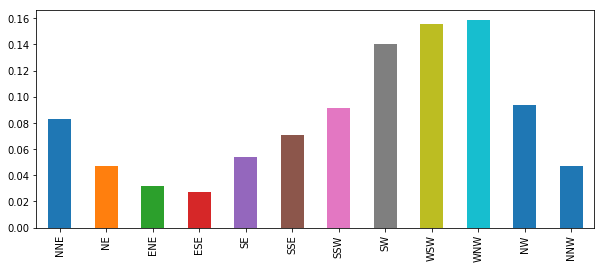

In [25]:
san_fran_wind.wind_direction.value_counts(normalize=True, sort=False).plot.bar(figsize=(10,4));

## Bonus tip 5.1: semicolumn after chart  
Adding a semicolumn after a call to a chart creation prevents the return values of that call to be displayed in the output.

# Tip 6. One hot encoding: get_dummies()

**Motivation:**   
Some algorithms (or their implementations) do not cope well with multi level categorical data.  
To solve this problem we might decide to use a technique called one hot encoding.

First, let's deal with the missing values

In [26]:
san_fran_wind = san_fran_wind.assign(
    wind_direction = (
        san_fran_wind
        .wind_direction
        .fillna("No Wind")
    )
)

ValueError: fill value must be in categories

This operation turns out to be not possible because the column we created using pd.cut() is a category and not a normal Series.  
To get around this problem we might do this.

In [27]:
san_fran_wind = san_fran_wind.assign(
    wind_direction = (
        san_fran_wind
        .wind_direction
        .cat
        .add_categories("No Wind")
        .fillna("No Wind")
    )
)

We now perform the one hot encoding
___

In [28]:
san_fran_wind_encoded = pd.get_dummies(san_fran_wind, prefix="", prefix_sep="")

___

In [29]:
san_fran_wind_encoded.head()

,San Francisco,NNE,NE,ENE,ESE,SE,SSE,SSW,SW,WSW,WNW,NW,NNW,No Wind
datetime,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1
2012-10-01 13:00:00,150.0,0,0,0,0,1,0,0,0,0,0,0,0,0
2012-10-01 14:00:00,147.0,0,0,0,0,1,0,0,0,0,0,0,0,0
2012-10-01 15:00:00,141.0,0,0,0,0,1,0,0,0,0,0,0,0,0
2012-10-01 16:00:00,135.0,0,0,0,0,1,0,0,0,0,0,0,0,0


# Tip 7. Getting a numpy array from a series or dataframe: values

**Motivation:**  
Sometimes we might want to provide as an input to a model a numpy array rather than a dataframe.  
Perhaps we want to implement our own (_modified_) version of an algorithm from scratch using numpy and linear algebra.

In [30]:
light_san_fran_wind_encoded = san_fran_wind_encoded.drop("San Francisco", axis=1)

___

In [31]:
light_san_fran_wind_encoded.values

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [32]:
light_san_fran_wind_encoded.values[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

___

# Inspecting wind direction data

In [33]:
temp = dfs["temperature.csv"]
temp.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


# Tip 8. Apply a function to the whole dataframe: applymap()

**Motivation:**  
Sometimes we have data that have the same unit of measurement in each column and we want to convert it into some other unit of measurement.

___

In [34]:
temp = (
    temp
    .assign(datetime = pd.to_datetime(temp["datetime"]))
    .set_index("datetime")
    .applymap(lambda x : (x-273.15))
)

___

In [35]:
temp.head(5)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,11.460000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.25,31.25,30.35
2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,11.457306,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.25,31.25,30.35
2012-10-01 15:00:00,11.476998,8.941866,16.310618,8.639833,18.712844,18.393355,20.242177,23.481487,12.083952,11.449918,...,12.606824,15.176940,12.697790,14.081672,34.241513,31.131841,37.261538,31.25,31.25,30.35
2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,11.442530,...,12.700440,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.25,31.25,30.35


# Tip 9. Apply a function over a window of the data: rolling()

**Motivation:**  
There is a wealth of models that can be applied to signal or timeseries data.  
Many of such models rely on the creation of _windows_ over the data (e.g. Moving Average)

Since this timeseries seems a little noisy, I decided to apply a function to smooth it

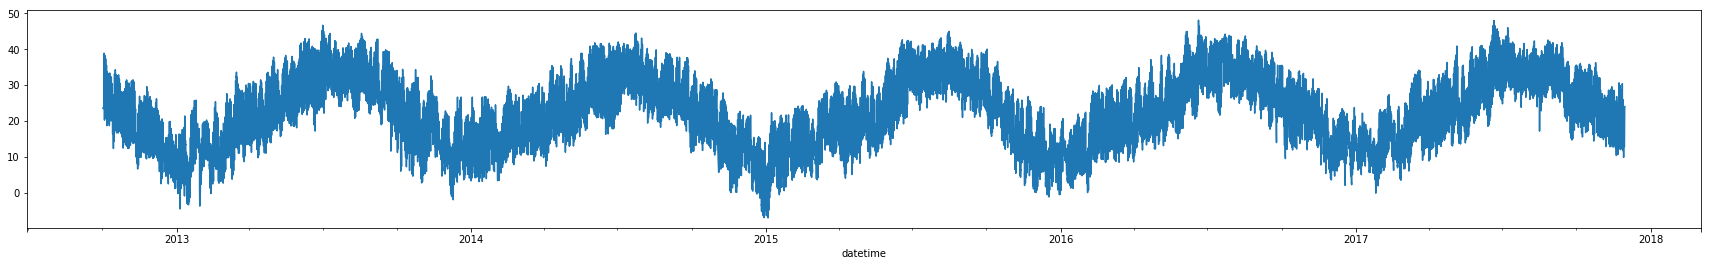

In [36]:
temp.Phoenix.plot(figsize=(30,4));

___

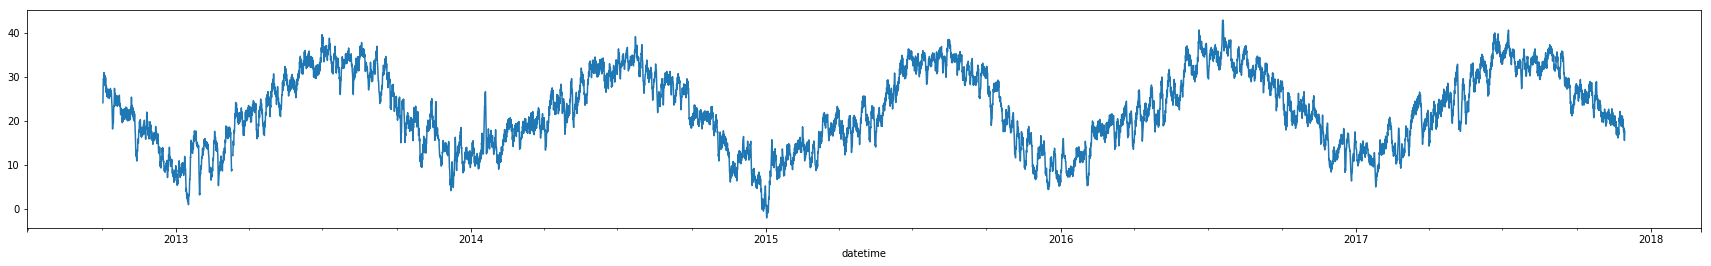

In [37]:
temp.Phoenix.rolling(window=28, center=True).mean().plot(figsize=(30,4));

___

When you define a window of size x, the point on which we are focusing is included in that size (window=0 returns no chart)

# Tip 10. Normalize a variable: transform()

**Motivation:**  
An aggregate function takes in n inputs and returns 1 output.  
At times we want to access this value for each of the n inputs we used to generate that one output.  
A clear case for this is the normalisation of a variable, for which we need to access mean and standard deviation.

Let's manipulate the data to generate a variable with only the year on which we will perform our grouping.

In [38]:
pho_temp = (
    temp
    .Phoenix
    .reset_index()
    .assign(
        year = temp.Phoenix.reset_index().datetime.dt.year
    )
)
pho_temp.head()

,datetime,Phoenix,year
0,2012-10-01 12:00:00,NaN,2012
1,2012-10-01 13:00:00,23.450000,2012
2,2012-10-01 14:00:00,23.458509,2012
3,2012-10-01 15:00:00,23.481487,2012
4,2012-10-01 16:00:00,23.504466,2012


___

In [39]:
pho_temp = pho_temp.assign(
    norm_temp = (
        pho_temp
        .groupby("year")
        .transform(lambda x: (x - x.mean()) / x.std())
    )
)

___

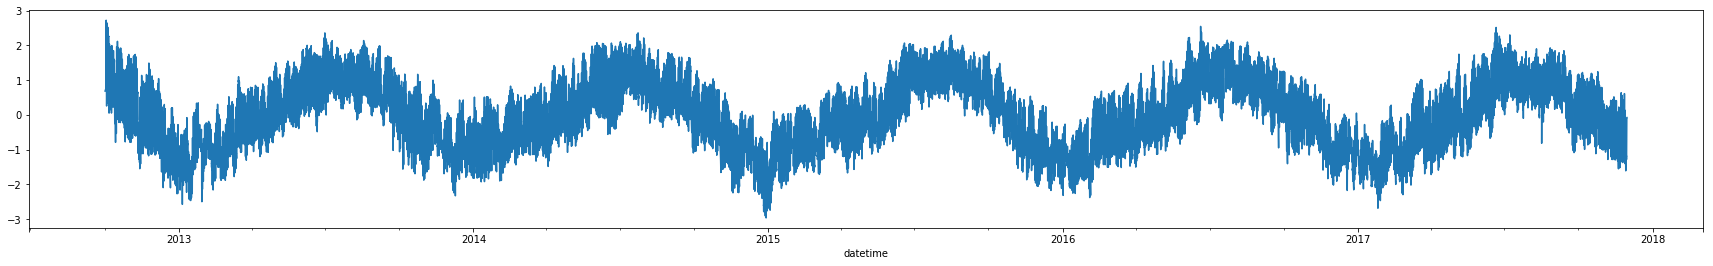

In [40]:
pho_temp.set_index("datetime").norm_temp.plot(figsize=(30,4));